In [1]:
import numpy as np
import pandas as pd

# Генерация синтетического набора данных для классификации
num_samples = 1000  # Количество образцов
num_features = 5    # Количество признаков

# Создание признаков и классов
features = np.random.rand(num_samples, num_features)
classes = np.random.randint(2, size=num_samples)  # 0 или 1 для бинарной классификации

# Создание DataFrame
dataset = pd.DataFrame(features, columns=[f"feature_{i}" for i in range(num_features)])
dataset['class'] = classes  # Добавление колонки с классами

# Сохранение датасета
dataset.to_csv("synthetic_dataset.csv", index=False)
print("Synthetic dataset generated and saved as synthetic_dataset.csv")


Synthetic dataset generated and saved as synthetic_dataset.csv


In [3]:
import pandas as pd

# Загрузка датасета из локального файла
file_path = r"C:\Users\Miha\Downloads\laptop_price.csv"
laptop_data = pd.read_csv(file_path, encoding="ISO-8859-1")

# Просмотр первых строк датасета
print(laptop_data.head())


   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   

In [37]:
import numpy as np
import csv

n = 100 


x = np.random.rand(n) * 10  

true_slope = 3.7
true_intercept = 2.5

noise = np.random.randn(n) * 0.5  # шум з нульовим середнім та стандартним відхиленням 0.5
y = true_slope * x + true_intercept + noise

#Записуємо дані у CSV файл
with open('C:\\Users\\Miha\\source\\repos\\Питон\\Лаб 5 (Інтелектуальний аналіз даних)\\generated_classification_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['x', 'y'])  #заголовки стовпців
    for i in range(n):
        writer.writerow([x[i], y[i]])

print("Набір даних успішно згенеровано та збережено у файл 'generated_classification_data.csv'.")


Набір даних успішно згенеровано та збережено у файл 'generated_classification_data.csv'.


          x          y
0  3.938962  17.041117
1  1.585226   8.993045
2  2.162726   9.570852
3  6.748003  27.371587
4  3.443716  15.424356
Середньоквадратична помилка (MSE): 0.19
Коефіцієнт детермінації R²: 1.00


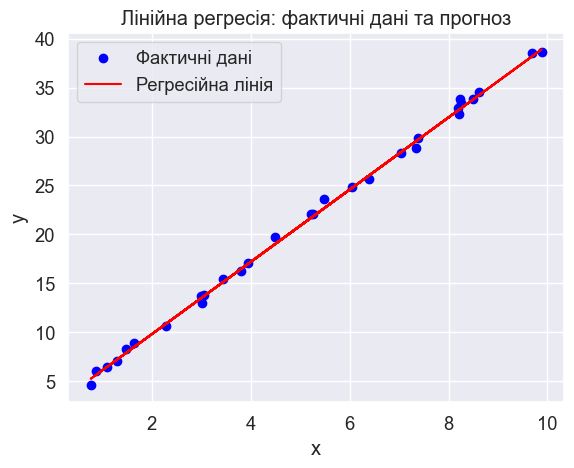

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Задайте шлях до вашого файлу
file_path = 'C:\\Users\\Miha\\source\\repos\\Питон\\Лаб 5 (Інтелектуальний аналіз даних)\\generated_classification_data.csv'

# Завантаження даних
data = pd.read_csv(file_path)

# Перевірка даних
print(data.head())

# Поділ на вхідні змінні (X) та цільову змінну (y)
X = data['x'].values.reshape(-1, 1)  # reshape для sklearn
y = data['y'].values

# Поділ даних на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Створення та тренування моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозування
y_pred = model.predict(X_test)

# Оцінка якості моделі
mse = mean_squared_error(y_test, y_pred)  # Середньоквадратична помилка
r2 = r2_score(y_test, y_pred)  # Коефіцієнт детермінації R²

print(f"Середньоквадратична помилка (MSE): {mse:.2f}")
print(f"Коефіцієнт детермінації R²: {r2:.2f}")

# Візуалізація результатів
plt.scatter(X_test, y_test, color='blue', label='Фактичні дані')
plt.plot(X_test, y_pred, color='red', label='Регресійна лінія')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Лінійна регресія: фактичні дані та прогноз')
plt.legend()
plt.show()


laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object
Середня квадратична помилка (MSE): 99166.00
R² Score: 0.81


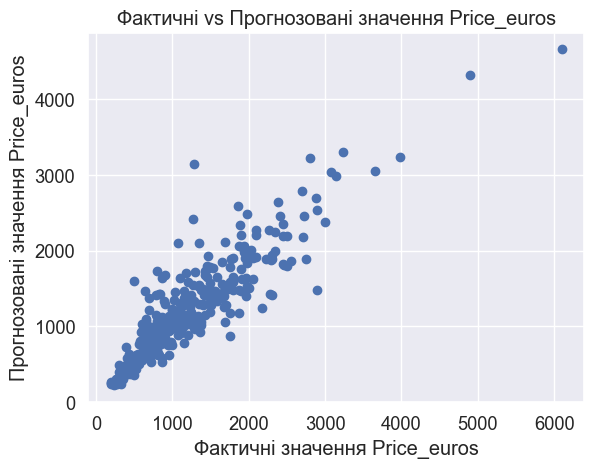

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import re  # Make sure to import the regular expression module

# Задайте шлях до вашого файлу
file_path = r'C:\Users\Miha\Downloads\laptop_price.csv'  # Ваш шлях до файлу

# Завантаження даних з вказаним кодуванням
data = pd.read_csv(file_path, encoding='latin1')  # або 'Windows-1252'

# Перевірка типів даних
print(data.dtypes)

# Ініціалізація кодувальників для категоріальних змінних
le_company = LabelEncoder()
le_type = LabelEncoder()
le_cpu = LabelEncoder()
le_gpu = LabelEncoder()
le_os = LabelEncoder()

# Кодування категоріальних змінних
data['Company'] = le_company.fit_transform(data['Company'])
data['TypeName'] = le_type.fit_transform(data['TypeName'])
data['Cpu'] = le_cpu.fit_transform(data['Cpu'])
data['Gpu'] = le_gpu.fit_transform(data['Gpu'])
data['OpSys'] = le_os.fit_transform(data['OpSys'])

# Обробка числових даних
data['Inches'] = pd.to_numeric(data['Inches'], errors='coerce')
data['Ram'] = data['Ram'].str.replace('GB', '').astype(float)  # Витягування значення з рядка
data['Weight'] = pd.to_numeric(data['Weight'], errors='coerce')

# Функція для парсингу пам'яті
def parse_memory(mem_str):
    match = re.search(r'(\d+\.?\d*)\s*(GB|TB)', mem_str)
    if match:
        size = float(match.group(1))
        unit = match.group(2)
        if unit == 'TB':
            return size * 1000  # Перевести TB в GB
        return size  # В GB
    return 0  # Якщо не знайдено, повертаємо 0

# Застосування функції для парсингу пам'яті
data['Memory'] = data['Memory'].apply(parse_memory)

# Вибір незалежних змінних і залежної змінної
X = data[['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']]
y = data['Price_euros']  # Ваша залежна змінна

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Створення моделі
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Прогнозування
y_pred = model.predict(X_test)

# Оцінка точності моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Середня квадратична помилка (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Візуалізація результатів
plt.scatter(y_test, y_pred)
plt.xlabel("Фактичні значення Price_euros")
plt.ylabel("Прогнозовані значення Price_euros")
plt.title("Фактичні vs Прогнозовані значення Price_euros")
plt.show()
